In [1]:
from keras.datasets import imdb

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = imdb.load_data()

Dataset of 25,000 movies reviews from IMDB, labeled by sentiment (positive/negative). Reviews have been preprocessed, and each review is encoded as a sequence of word indexes (integers). For convenience, words are indexed by overall frequency in the dataset, so that for instance the integer "3" encodes the 3rd most frequent word in the data. This allows for quick filtering operations such as: "only consider the top 10,000 most common words, but eliminate the top 20 most common words".

To see original form of each of 25000 reviews : http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
T know about how they preprocessed this review to encode into sequence of integers : https://github.com/fastai/fastai/blob/master/courses/dl1/lesson4-imdb.ipynb

In [3]:
print len(x_train),x_train[0],

25000 [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [4]:
import numpy
X = numpy.concatenate((x_train, x_test), axis=0)
y = numpy.concatenate((y_train, y_test), axis=0)

In [5]:
from matplotlib import pyplot
#Average review length
print("Review length: ")
result = [len(x) for x in X]
print("Mean %.2f words (%f)" % (numpy.mean(result), numpy.std(result)))
# plot review length
pyplot.boxplot(result)
pyplot.show()

Review length: 
Mean 234.76 words (172.911495)


In [6]:
(X_train, Y_train), (X_test, Y_test) = imdb.load_data(nb_words=5000) #indexing only 5000 most common words and rest are replaced with OOB_CHAR(here this value is 2

/usr/local/lib/python2.7/dist-packages/keras/datasets/imdb.py:45: UserWarning: The `nb_words` argument in `load_data` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `load_data` '


In [7]:
X = numpy.concatenate((X_train, X_test), axis=0)
y = numpy.concatenate((y_train, y_test), axis=0)

Review length: 
Mean 234.76 words (172.911495)


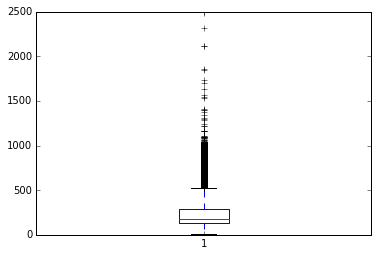

In [8]:
#Average review length
print("Review length: ")
result = [len(x) for x in X]
print("Mean %.2f words (%f)" % (numpy.mean(result), numpy.std(result)))
# plot review length
pyplot.boxplot(result)
pyplot.show()

We can see that the average review has just under 300 words with a standard deviation of just over 200 words.
We need to do some more processing on the integer data: keras needs all sequences (or reviews) to be of equal length.

We can choose to pad all sequences to the longest length, or we can choose a maximum review length and cut longer reviews. We'll cut reviews after 500 words and pad them if needed: 

In [9]:
from keras.preprocessing import sequence
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

Word Embeddings:
This is a technique where words are encoded as real-valued vectors in a high-dimensional space, where the similarity between words in terms of meaning translates to closeness in the vector space.

Discrete words are mapped to vectors of continuous numbers. This is useful when working with natural language problems with neural networks and deep learning models are we require numbers as input.

Keras provides a convenient way to convert positive integer representations of words into a word embedding by an Embedding layer.

The layer takes arguments that define the mapping including the maximum number of expected words also called the vocabulary size (e.g. the largest integer value that will be seen as an integer). The layer also allows you to specify the dimensionality for each word vector, called the output dimension.
<<Embedding(5000, 32, input_length=500)>>
The output of this first layer would be a matrix with the size 32×500 for a given review training or test pattern in integer format.


MODEL IMPLEMENTATION

In [154]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.layers import Dropout
seed = 7
numpy.random.seed(seed)


#LSTM with dropout
The first layer is the Embedded layer that uses 32 length vectors to represent each word. The next layer is the LSTM layer with 100 memory units (smart neurons). Finally, because this is a classification problem we use a Dense output layer with a single neuron and a sigmoid activation function to make 0 or 1 predictions for the two classes (good and bad) in the problem.

Because it is a binary classification problem, log loss is used as the loss function (binary_crossentropy in Keras). The efficient ADAM optimization algorithm is used. 
Recurrent Neural networks like LSTM generally have the problem of overfitting.

Dropout can be applied between layers using the Dropout Keras layer. We can do this easily by adding new Dropout layers between the Embedding and LSTM layers and the LSTM and Dense output layers.

In [155]:
top_words=5000
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_words))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train, nb_epoch=3, batch_size=64)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 500, 32)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 101       
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________
None


/usr/local/lib/python2.7/dist-packages/keras/models.py:844: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/3
25000/25000 [==============================] - 2207s - loss: 0.4835 - acc: 0.7677  
Epoch 2/3
25000/25000 [==============================] - 2062s - loss: 0.3134 - acc: 0.8741  
Epoch 3/3
25000/25000 [==============================] - 1793s - loss: 0.3224 - acc: 0.8615  
Accuracy: 85.48%


In [156]:
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

LSTM and Convolutional Neural Network For Sequence Classification

Convolutional neural networks excel at learning the spatial structure in input data.

The IMDB review data does have a one-dimensional spatial structure in the sequence of words in reviews and the CNN may be able to pick out invariant features for good and bad sentiment. This learned spatial features may then be learned as sequences by an LSTM layer.

We can easily add a one-dimensional CNN and max pooling layers after the Embedding layer which then feed the consolidated features to the LSTM. We can use a smallish set of 32 features with a small filter length of 3. The pooling layer can use the standard length of 2 to halve the feature map size.

In [158]:
model1 = Sequential()
model1.add(Embedding(top_words, embedding_vecor_length, input_length=max_words))
model1.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model1.add(MaxPooling1D(pool_size=2))
model1.add(LSTM(100))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model1.summary())
model1.fit(X_train, y_train, epochs=3, batch_size=64)
# Final evaluation of the model
scores = model1.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 500, 32)           3104      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 250, 32)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 101       
Total params: 216,405
Trainable params: 216,405
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/3
25000/25000 [==============================] - 787s - loss: 0.4578 - acc: 0.7616   
Epoch 2/3
25000/25000 [==============

In [159]:
#NOW USING THIS MODEL TO PREDICT ON OUR EXAMPLE
word_index = imdb.get_word_index()

In [160]:
word_index

{u'fawn': 34701,
 u'tsukino': 52006,
 u'nunnery': 52007,
 u'sonja': 16816,
 u'vani': 63951,
 u'woods': 1408,
 u'spiders': 16115,
 u'hanging': 2345,
 u'woody': 2289,
 u'trawling': 52008,
 u"hold's": 52009,
 u'comically': 11307,
 u'localized': 40830,
 u'disobeying': 30568,
 u"'royale": 52010,
 u"harpo's": 40831,
 u'canet': 52011,
 u'aileen': 19313,
 u'acurately': 52012,
 u"diplomat's": 52013,
 u'rickman': 25242,
 u'rumbustious': 52014,
 u'familiarness': 52015,
 u"spider'": 52016,
 u'hahahah': 68804,
 u"wood'": 52017,
 u'transvestism': 40833,
 u"hangin'": 34702,
 u'screaming': 1927,
 u'seamier': 40834,
 u'wooded': 34703,
 u'bravora': 52018,
 u'grueling': 16817,
 u'wooden': 1636,
 u'wednesday': 16818,
 u"'prix": 52019,
 u'altagracia': 34704,
 u'circuitry': 52020,
 u'crotch': 11585,
 u'busybody': 57766,
 u"tart'n'tangy": 52021,
 u'pantheistic': 52022,
 u'thrace': 52023,
 u"tom's": 11038,
 u'snuggles': 52025,
 u"frasier's": 52026,
 u'complainers': 52027,
 u'templarios': 52125,
 u'272': 40835

In [161]:

from keras.preprocessing import text


In [162]:
def conv_to_proper_format(sentence):
    sentence=text.text_to_word_sequence(sentence,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True,split=" ")
    sentence=numpy.array([word_index[word] if word in word_index else 0 for word in sentence])#Encoding into sequence of integers
    sentence[sentence>5000]=2
    L=500-len(sentence)
    sentence=numpy.pad(sentence, (L,0), 'constant')
    sentence=sentence.reshape(1,-1)
    return sentence


In [163]:
review="Rita Hayworth plays a Brooklyn nightclub dancer named Rusty who specializes in cheesecake chorus revues; she manages to get herself on the cover of a national fashion magazine, but her impending success as a solo (with romantic offers all around) has smitten boss Gene Kelly chomping at the bit. Terribly tired piece of Technicolor cotton candy, with unmemorable musical sketches (the two worst of which are irrelevant flashbacks to the 1890s, with Hayworth portraying her own grandmother). Kelly, as always, dances well but acts with false sincerity; when he's serious, he's insufferable, and the rest of the time he's flying on adrenaline. The script is a lead weight, not even giving supporting players Phil Silvers and Eve Arden any good lines."
review1=conv_to_proper_format(review)

In [164]:
model.predict(review1)

array([[0.93734217]], dtype=float32)

In [165]:
model1.predict(review1)

array([[0.02725327]], dtype=float32)

In [169]:
review="He has never shown any intrest in Indian politics. He even after being elected as a M.P continuously has an attendance of less than 50% in the parliament. I can challenge he would not be able to name all the states in our country. Youth is not someone who is not married, he is 45 years old, he is not a youth leader by his age or his works."
review1=conv_to_proper_format(review)

In [170]:
model.predict(review1)

array([[0.7044157]], dtype=float32)

In [171]:
model1.predict(review1)

array([[0.43876272]], dtype=float32)